<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B/TSML_14_HW3_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import tqdm

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

aic: 853.71501 | order: (4, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -1.910458
p-value                         0.327157
#Lags Used                     11.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


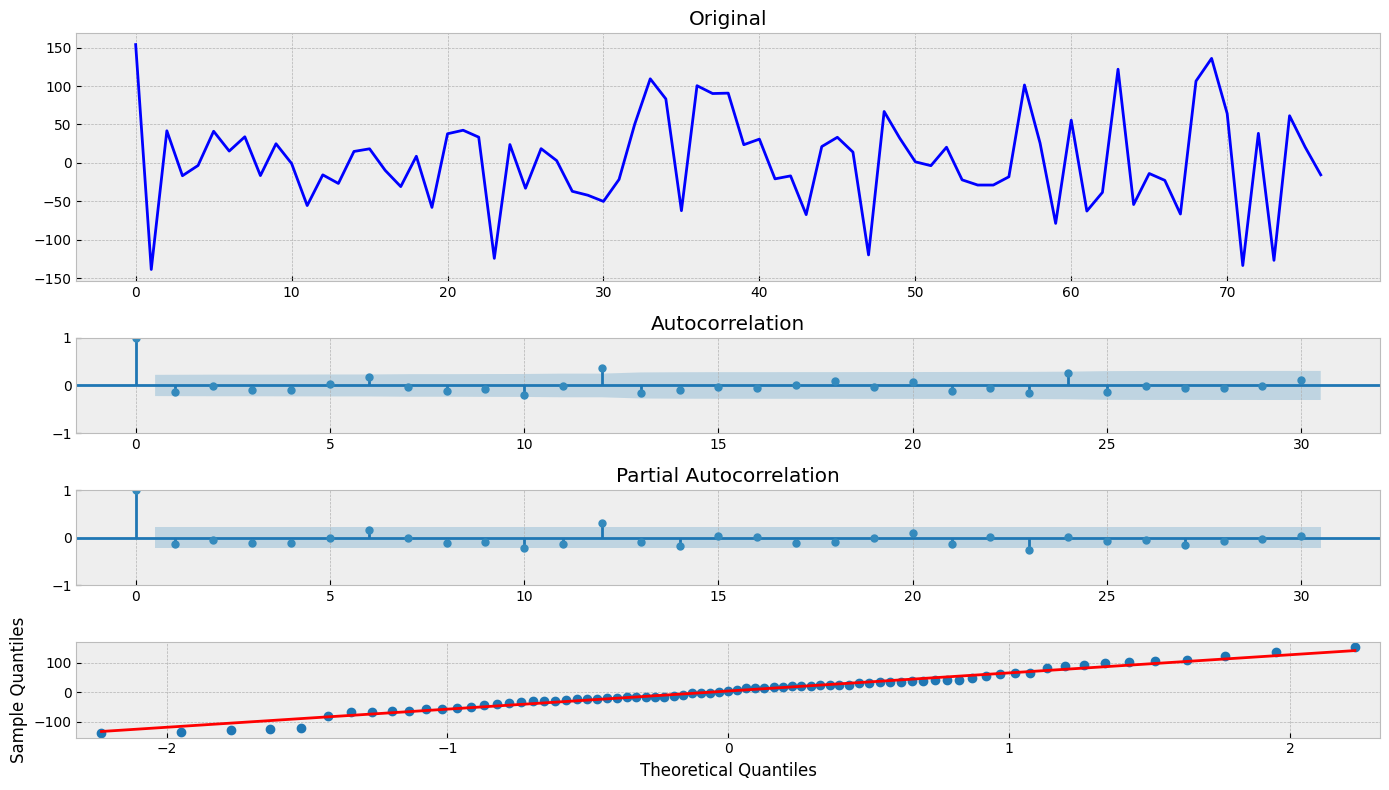

In [ ]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']

best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=(i,d,j), trend='n').fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

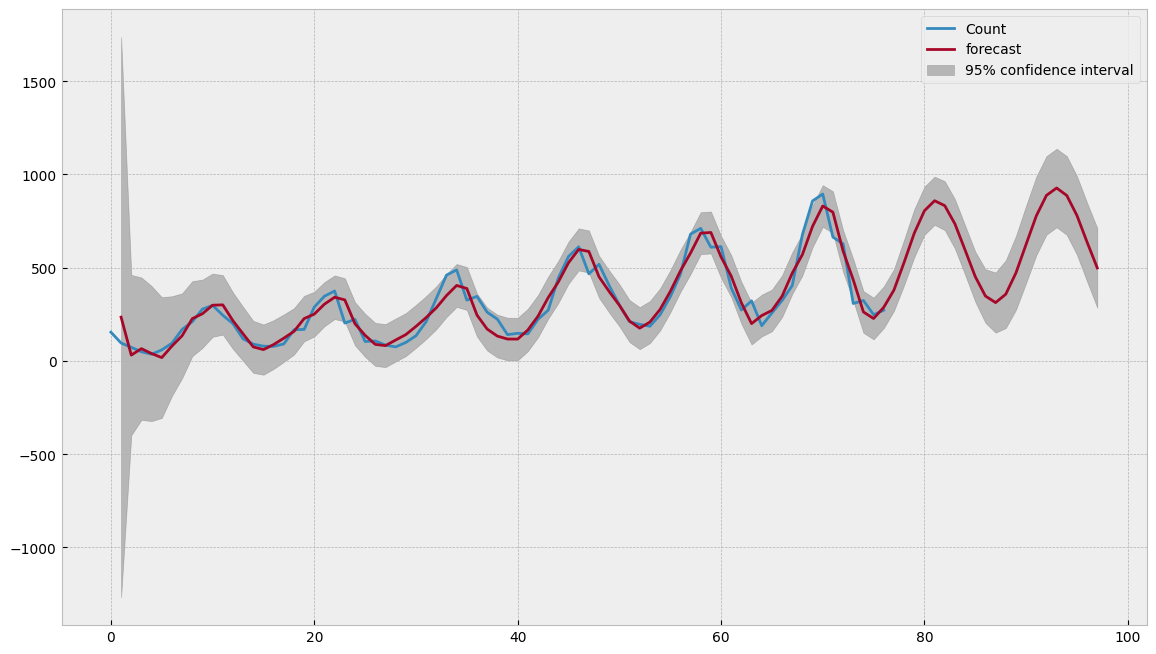

In [ ]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(14,8))
    ax = series.loc['0':].plot(ax=ax)
    plot_predict(best_mdl, 1, len(series)+20, ax=ax)
    plt.show()

# **Дополнительная часть**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Count   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()
cols = ['Month']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [ ]:
x = df1.drop(['Count'], axis=1)
y = df1['Count']

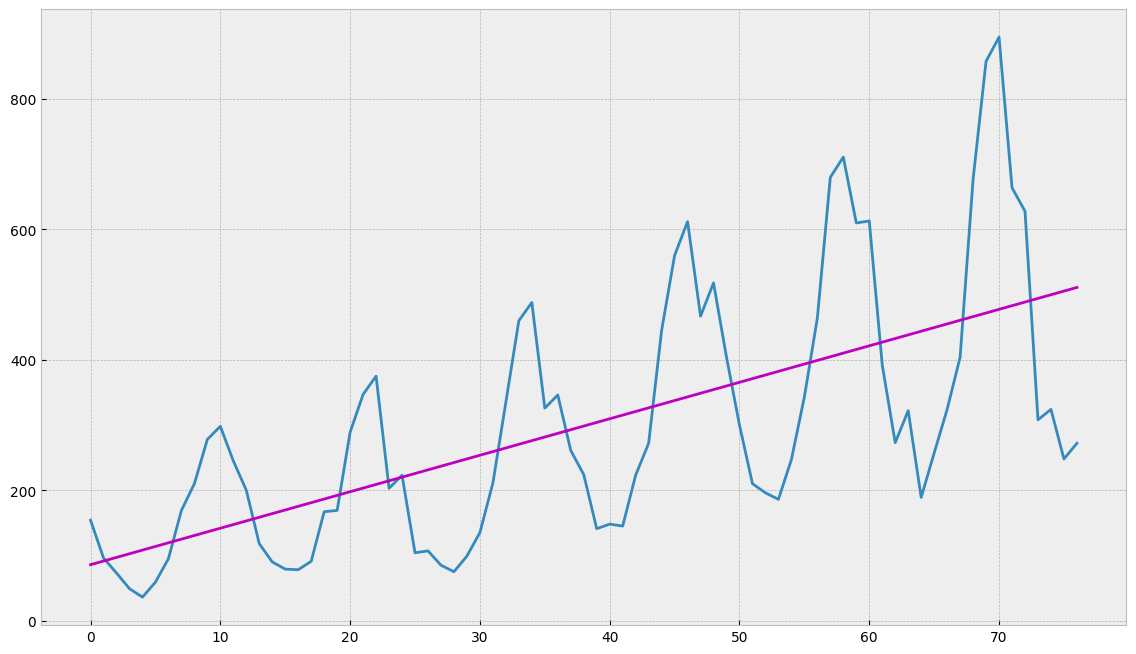

In [ ]:
lr = LinearRegression()
lr.fit(x, y)
y_pred_lr = lr.predict(x)
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(14,8))
    ax = series.loc['0':].plot(ax=ax)
    plt.plot(x, y_pred_lr, color='m')
    plt.show()

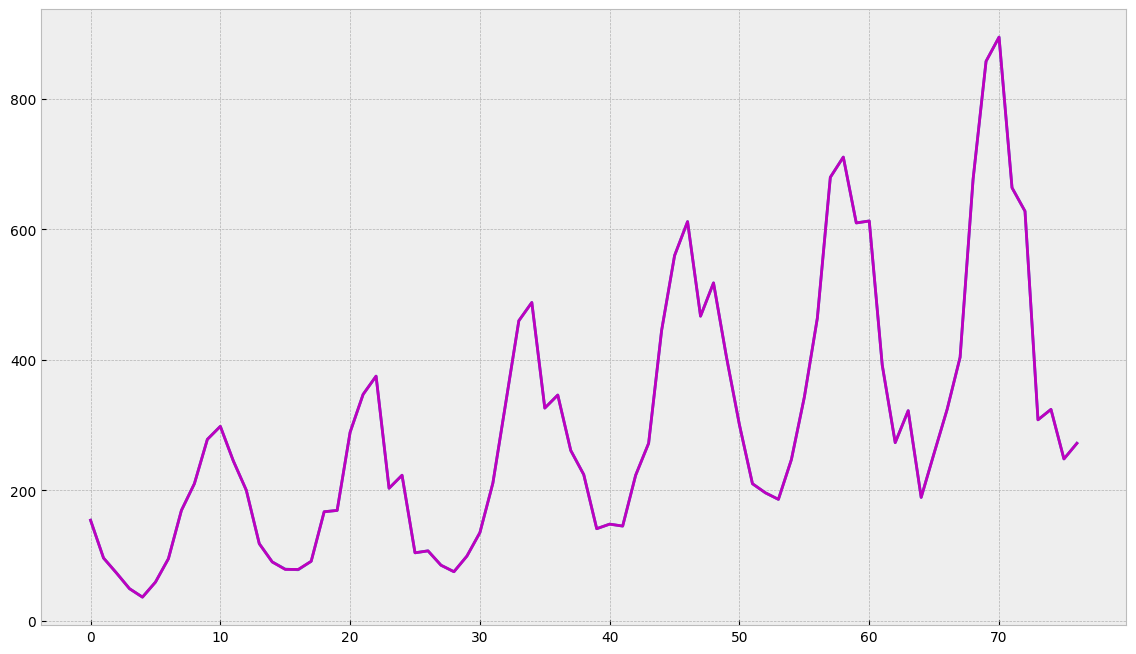

In [ ]:
dtr = DecisionTreeRegressor(max_depth = 10, criterion= 'squared_error', random_state=42)
dtr.fit(x, y)
y_pred_dtr = dtr.predict(x)
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(14,8))
    ax = series.loc['0':].plot(ax=ax)
    plt.plot(x, y_pred_dtr, color='m')
    plt.show()

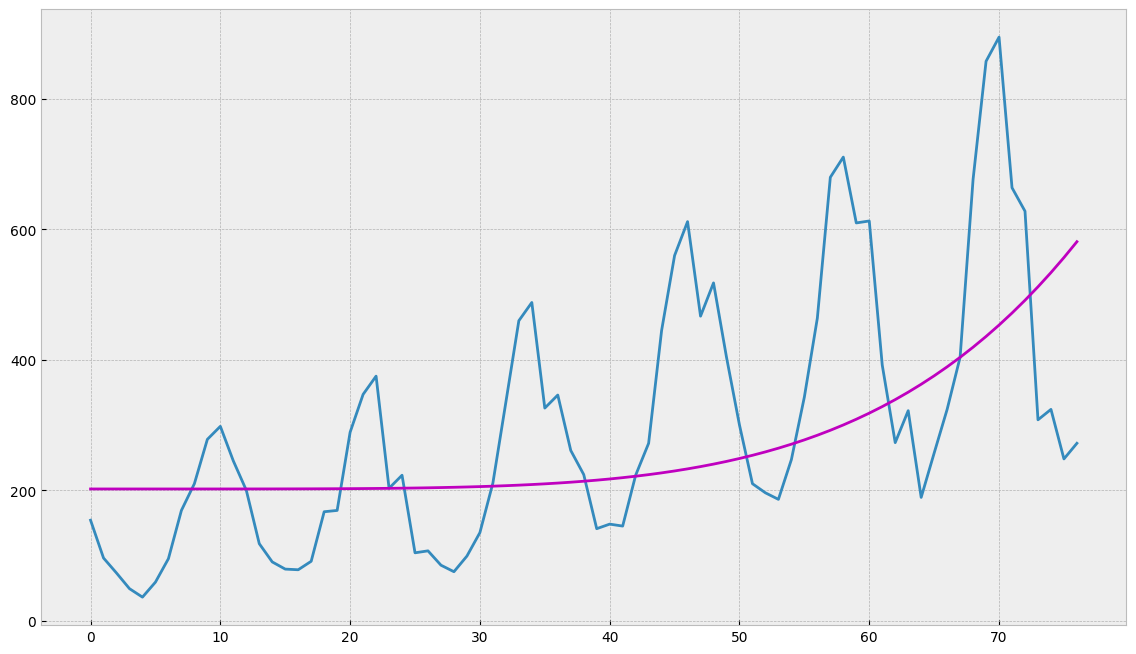

In [ ]:
svr = SVR(kernel='poly', degree=5)
svr.fit(x, y)
y_pred_svr = svr.predict(x)
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(14,8))
    ax = series.loc['0':].plot(ax=ax)
    plt.plot(x, y_pred_svr, color='m')
    plt.show()